# BigMart Data Ensemble Learning

This assignment will discuss regression based on prediction models from ensemble learning. There are several columns such as item weight, item fat content, item type, item MRP, outlet size, and item outlet sales. The prediction model is used to predict the sales amount in item_outlet_sales for each product in a particular store.

First, the required libraries will be imported during the regression process

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, AdaBoostRegressor, GradientBoostingRegressor

## Pre-Processing

The dataset consists of 13 columns with a total of 8523 records.

There are several columns such as item identifier, item weight, item fat content, item visibility, item type, item MRP, outlet identifier, outlet establishment year, outlet size, outlet location type, outlet type, and item outlet sales.

There are several numerical data columns such as item weight, item visibility, item MRP, and outlet establishment year. Other than these columns are categorical data that must be processed with labeling first.

In [ ]:
data=pd.read_csv('BigMartSales.csv')

In [ ]:
data

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Delete the first column, which is the index from the Bigmart Data table, because Python automatically provides an index.

In [ ]:
data.drop(data.columns[[0]], axis=1, inplace=True)

In [ ]:
data.shape

(8523, 12)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


It can be seen that some of the data have object data types for categorical data, float64, and int64.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Understanding Categorical Value

There are many columns with categorical data such as item identifier, item fat content, item type, outlet identifier, outlet size, outlet location type, and outlet type.

In [ ]:
data.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
data.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

### Fill Missing Value

Check for missing values in the BigMart dataset. There are many missing values in the item identifier and outlet size columns.

In [ ]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Because Item_Weight and Outlet_Size have Null values, they must be handled, and Outlet establishment year does not have any meaning if calculating sales. But, if using outlet age, it might be useful.

In [ ]:
outlet_table = data.groupby(by=['Outlet_Identifier','Outlet_Size']).count().reset_index()[['Outlet_Identifier','Outlet_Size']]
outlet_table

,Outlet_Identifier,Outlet_Size
0,OUT013,High
1,OUT018,Medium
2,OUT019,Small
3,OUT027,Medium
4,OUT035,Small
5,OUT046,Small
6,OUT049,Medium


In [ ]:
outlet_table = data.groupby(by=['Outlet_Type','Outlet_Size']).count().reset_index()[['Outlet_Type','Outlet_Size']]
outlet_table

,Outlet_Type,Outlet_Size
0,Grocery Store,Small
1,Supermarket Type1,High
2,Supermarket Type1,Medium
3,Supermarket Type1,Small
4,Supermarket Type2,Medium
5,Supermarket Type3,Medium


SuperMarket type2 and type3 are mostly Medium in size and Grocery Store is Small. But if the type is SuperMarket type1, then all three possibilities exist. Next, the most frequent value will be considered as a safeguard in case type3 storage occurs.

In [ ]:
item_table = data.groupby(by=['Item_Identifier','Item_Weight']).count().reset_index()[['Item_Identifier','Item_Weight']].groupby('Item_Identifier').mean().reset_index()
item_table

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1550,NCZ30,6.590
1551,NCZ41,19.850
1552,NCZ42,10.500
1553,NCZ53,9.600


Next, create two tables, outlet_table and item_table, consisting of outlet type and its size, and items with their average weight, respectively.

This is done by linking these values in the training data and if there are more NaN values, they will be linked using the average.

In [ ]:
def fillna(dataframe):

    #Imputing Values based on outlet_table and item_table
    dataframe['Item_Weight'] = dataframe[['Item_Identifier','Item_Weight']].groupby(by=['Item_Identifier']).transform(lambda x: x.fillna(x.mean()))['Item_Weight']
    dataframe['Outlet_Size'] = dataframe[['Outlet_Type','Outlet_Size']].groupby(by='Outlet_Type').transform(lambda x: x.fillna(x.mode()[0]))['Outlet_Size']


    #Imputing values if there are any more nan values present
    dataframe.Item_Weight.fillna(dataframe.Item_Weight.mean(), inplace=True)
    dataframe.Outlet_Size.fillna(dataframe.Outlet_Size.mode()[0], inplace=True)

    dataframe.Item_Fat_Content.replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}, inplace=True)
    dataframe['Outlet_Age'] = 2022 - pd.to_numeric(dataframe['Outlet_Establishment_Year'])

    return dataframe

In [ ]:
fillna(data).Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

After filling several NaN columns, the data is checked again and all data already has values.

In [ ]:
fillna(data).isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64

## Exploratory Data Analysis

In [ ]:
eda_df = fillna(data).copy()
eda_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

In [ ]:
eda_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,35
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,20
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,18
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,13


A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations. It can be seen in the figure that the further to the right, the distribution of item outlet sales becomes lower and shows more values at low item outlet sales

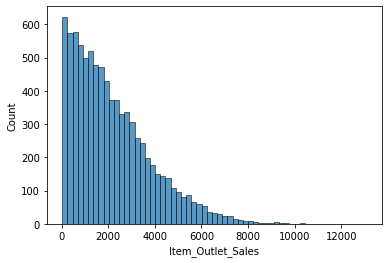

In [ ]:
import seaborn as sns
sns.histplot(data=eda_df, x='Item_Outlet_Sales')

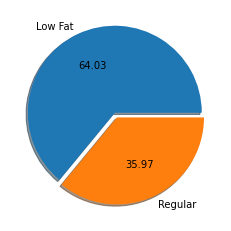

In [ ]:
import matplotlib.pyplot as plt
pie=eda_df.groupby(by='Item_Fat_Content').sum()
plt.pie(labels=pie.index, x=pie['Item_Outlet_Sales'], explode=[0.03]*len(pie.index) , autopct="%.2f", shadow=True);

Low Fat products seem to perform well compared to Regular products. This pie chart shows that people tend to prefer Low fat products over regular products.


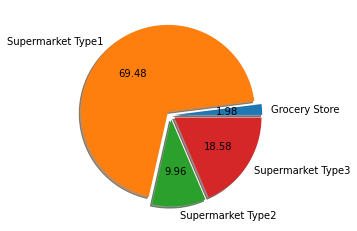

In [ ]:
pie=eda_df.groupby(by='Outlet_Type').sum()
plt.pie(labels=pie.index, x=pie['Item_Outlet_Sales'], explode=[0.05]*len(pie.index), autopct="%.2f",shadow=True);

It seems that most sales are generated by SuperMarket Type 1 stores and the least sales are generated by Grocery Stores.

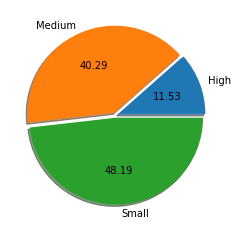

In [ ]:
pie=eda_df.groupby(by='Outlet_Size').sum()
plt.pie(labels=pie.index, x=pie['Item_Outlet_Sales'], explode=[0.03]*len(pie.index), autopct="%.2f",shadow=True);

Most sales are generated by small stores followed by medium stores. If we look at the pie chart above, the previous pie chart (outlet_table) clearly shows that there are only 2 store types categorized as small, namely Grocery Store and SuperMarket1. So it can be concluded that most small store sales come from SuperMarket Type 1 stores.

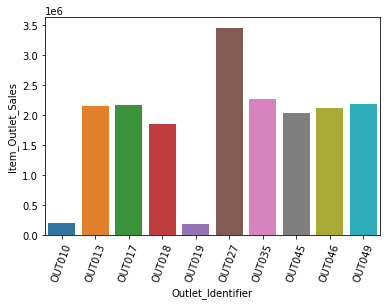

In [ ]:
bar=eda_df.groupby(by='Outlet_Identifier').sum()
sns.barplot(data=bar,x=bar.index,y='Item_Outlet_Sales');
plt.xticks(rotation=70);

Outlet OUT027 achieved the highest sales, while OUT019 and OUT10 achieved the lowest sales.

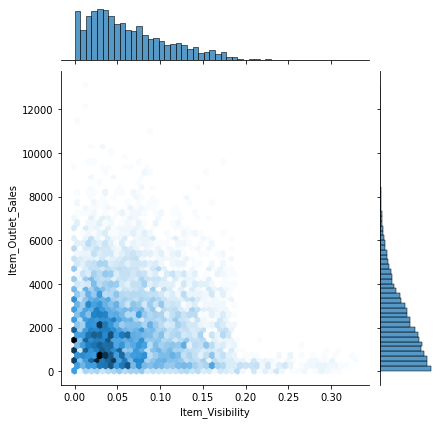

In [ ]:
sns.jointplot(data=eda_df, x='Item_Visibility',y='Item_Outlet_Sales',kind='hex');

It can be seen from the plot above that some products with higher visibility are not sold much compared to some products that do not have visibility.

This indicates that increased visibility does not guarantee sales.

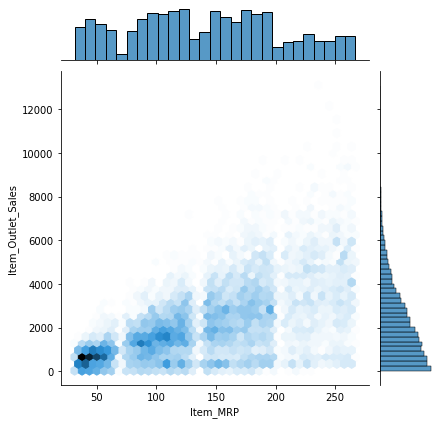

In [ ]:
sns.jointplot(data=eda_df, x='Item_MRP',y='Item_Outlet_Sales', kind='hex');

The plot above shows that items with the lowest MRP are sold the most, but their total sales value is much lower compared to items with higher MRP.

Conclusion From EDA
- People tend to prefer Low Fat products over regular ones
- Most sales are generated by SuperMarket Type 1 stores
- Most sales are generated by small stores followed by medium stores
Outlet OUT027 has achieved the highest sales
- Some products with higher visibility are not sold much compared to some products that do not have visibility

## Encoding Categorical Variables

Convert categorical data into numbers so it can be processed in an ensemble learning model. One Hot Encoding is used to convert categorical numeric variables into binary vectors. Before applying this algorithm. Make sure categorical values must be label encoded because one hot encoding only takes numeric categorical values.

First, identify the unique values in each categorical column in the BigMart data.

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

In [ ]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
data.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [ ]:
data.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
data.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
data.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [ ]:
data.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

### Encode

Most existing machine learning algorithms cannot run on categorical data. Instead, categorical data must first be converted into numeric data. One Hot Encoding is one technique used to perform this conversion. This method is widely used when deep learning techniques will be applied to sequential classification problems. One Hot Encoding ensures that machine learning does not assume that higher numbers are more important.

In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Item_Type','Outlet_Size','Outlet_Location_Type', 'Item_Fat_Content','Outlet_Type', 'Outlet_Identifier'])
one_hot_encoded_data

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.300,0.016047,249.8092,1999,3735.1380,23,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.019278,48.2692,2009,443.4228,13,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.016760,141.6180,1999,2097.2700,23,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.000000,182.0950,1998,732.3800,24,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.000000,53.8614,1987,994.7052,35,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,1987,2778.3834,35,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,0.046982,108.1570,2002,549.2850,20,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,2004,1193.1136,18,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0.145221,103.1332,2009,1845.5976,13,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Item_Outlet_Sales                8523 non-null   float64
 6   Outlet_Age                       8523 non-null   int64  
 7   Item_Type_Baking Goods           8523 non-null   uint8  
 8   Item_Type_Breads                 8523 non-null   uint8  
 9   Item_Type_Breakfast              8523 non-null   uint8  
 10  Item_Type_Canned                 8523 non-null   uint8  
 11  Item_Type_Dairy                  8523 non-null   uint8  
 12  Item_Type_Frozen Foo

### Change Datatype

Change the data type from uint8 to int64

In [ ]:
import copy
one_hot_encoded_data1 = copy.deepcopy(one_hot_encoded_data)
# one_hot_encoded_data1 = one_hot_encoded_data1.drop(one_hot_encoded_data1.columns[[6]], axis=1, inplace=True)
# print(one_hot_encoded_data1)
one_hot_encoded_data1

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.300,0.016047,249.8092,1999,3735.1380,23,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.019278,48.2692,2009,443.4228,13,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.016760,141.6180,1999,2097.2700,23,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.000000,182.0950,1998,732.3800,24,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.000000,53.8614,1987,994.7052,35,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,1987,2778.3834,35,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,0.046982,108.1570,2002,549.2850,20,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,2004,1193.1136,18,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0.145221,103.1332,2009,1845.5976,13,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
one_hot_encoded_data1 = one_hot_encoded_data1.drop(['Item_Identifier','Outlet_Age'], axis=1)
one_hot_encoded_data1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df = one_hot_encoded_data1

In [ ]:
x = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [ ]:
df_1 = x.iloc[:,:4]
df_2 = x.iloc[:,4:]

In [ ]:
df_1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,1999
1,5.920,0.019278,48.2692,2009
2,17.500,0.016760,141.6180,1999
3,19.200,0.000000,182.0950,1998
4,8.930,0.000000,53.8614,1987
...,...,...,...,...
8518,6.865,0.056783,214.5218,1987
8519,8.380,0.046982,108.1570,2002
8520,10.600,0.035186,85.1224,2004
8521,7.210,0.145221,103.1332,2009


In [ ]:
df_2

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_2 = df_2.astype(int)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Item_Type_Baking Goods           8523 non-null   int64
 1   Item_Type_Breads                 8523 non-null   int64
 2   Item_Type_Breakfast              8523 non-null   int64
 3   Item_Type_Canned                 8523 non-null   int64
 4   Item_Type_Dairy                  8523 non-null   int64
 5   Item_Type_Frozen Foods           8523 non-null   int64
 6   Item_Type_Fruits and Vegetables  8523 non-null   int64
 7   Item_Type_Hard Drinks            8523 non-null   int64
 8   Item_Type_Health and Hygiene     8523 non-null   int64
 9   Item_Type_Household              8523 non-null   int64
 10  Item_Type_Meat                   8523 non-null   int64
 11  Item_Type_Others                 8523 non-null   int64
 12  Item_Type_Seafood                8523 non-null  

In [ ]:
data1 = pd.concat([df_1, df_2], axis = 1)
data1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0.016047,249.8092,1999,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,2009,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,1999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.000000,182.0950,1998,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,2002,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,2009,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
x = data1

## Basic Ensemble Learning Techniques

The experiment also applies basic ensemble techniques to compare them with stacking and XGBoost. The basic ensemble uses linear regression, KNeighbor Regression, and Decision Tree Regression. These models are compared with each other and also use several techniques such as max voting, averaging, weighted averaging, and rank averaging.

R-Squared (R² or coefficient of determination) is a statistical measure in regression models that determines the proportion of variance in the dependent variable that can be explained by the independent variables.

In general, the higher the R-squared, the better the model fits the dataset used.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

### Split Data

In [ ]:
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0.016047,249.8092,1999,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,2009,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,1999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.000000,182.0950,1998,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,2002,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,2009,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Split the data into 80% training and 20% testing

In [ ]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y = train_test_split(x,y, random_state = 101, shuffle = True, test_size = 0.2)

In [ ]:
train_x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
3684,19.250,0.101689,54.6956,1987,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1935,7.630,0.061410,94.6436,2007,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5142,19.350,0.065891,167.0816,2007,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4978,6.380,0.031898,177.4344,1997,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2299,16.700,0.022110,110.8886,2002,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,5.000,0.044005,188.8530,1997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5695,14.650,0.170664,56.4614,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8006,12.500,0.018849,96.7384,1997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1361,9.695,0.129009,226.9404,2007,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
valid_x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
8179,11.00,0.055163,100.3358,2009,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8355,18.00,0.038979,148.6418,1987,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3411,7.72,0.074731,77.5986,1997,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7089,20.70,0.049035,39.9506,2007,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6954,7.55,0.027225,152.9340,2002,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,16.75,0.105019,155.2630,1999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4996,8.52,0.027059,153.3682,1997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
531,15.60,0.111686,184.7924,1998,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3891,17.10,0.000000,114.6860,2009,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
train_y

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [ ]:
valid_y

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

### Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs regression tasks. The regression model predicts the target value based on independent variables. It is mostly used to determine relationships between variables and forecasting.

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import LinearRegression

#model1 = make_pipeline(StandardScaler(), LinearRegression())
model1 = LinearRegression()
model1.fit(train_x, train_y)

pred1=model1.predict(valid_x)
pred1[:10], model1.score(valid_x, valid_y)

(array([ 1339.0499892 ,  2421.59701314,  1335.77506317,   847.99213563,
         2421.81043296, -1161.85243409,   656.42148836,  2450.76086906,
           29.49549301,  2457.08917571]), 0.557868124498643)

### Kneighbors Regression

K nearest neighbors is a simple algorithm that stores all available cases and predicts the numerical target based on a similarity measure (e.g., a distance function).

A simple implementation approach of KNN regression is to compute the average numeric target of the K nearest neighbors. Another approach uses an inverse-distance weighted average of the K nearest neighbors. KNN regression uses the same distance function as KNN classification.

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(train_x,train_y)
pred2=model2.predict(valid_x)
pred2[:10], model2.score(valid_x, valid_y)

(array([1607.77384, 3363.88792, 1475.01332,  493.3578 , 1997.13368,
         732.91264,  737.17376, 2386.09404,  282.03288, 2344.81444]),
 0.41968077510810897)

### Decision Tree Regression

Decision trees are a type of supervised machine learning algorithm used by trainers using AutoML and classify or regress data using true or false answers to certain questions.

The resulting structure, if visualized, is tree-shaped with various types of nodes—root, internal, and leaf. The root node is the starting point for decision trees, which then branch into internal nodes and leaf nodes. Leaf nodes are the final classification category or real value. Decision trees are easy to understand and explain.

In [ ]:
model3 = DecisionTreeRegressor(max_depth=7)
model3.fit(train_x,train_y)
pred3=model3.predict(valid_x)
pred3[:10], model3.score(valid_x, valid_y)

(array([1358.05382817, 2689.56467121, 1322.87354014,  640.74898092,
        2452.76974875,   62.64761875,  871.58234393, 2689.56467121,
         241.62012549, 1621.48932   ]), 0.5776453260234855)

#### Max Voting

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The prediction from each model is considered a ‘vote’. The prediction obtained from the majority of models is used as the final prediction.

In [ ]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(valid_x)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))


In [ ]:
from sklearn.metrics import r2_score
r2_score(valid_y, final_pred)

0.557868124498643

In [ ]:
r2_score(valid_y, pred1), r2_score(valid_y, pred2), r2_score(valid_y, pred3)

(0.557868124498643, 0.41968077510810897, 0.5776453260234855)

#### (Legacy)

In [ ]:
# from sklearn.model_selection import train_test_split
# train_x,valid_x,train_y,valid_y = train_test_split(x,y, random_state = 101, shuffle=False)

In [ ]:
# train_x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.00,0.097276,223.9088,1985,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
6388,16.35,0.020664,50.8324,2007,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6389,21.35,0.078061,96.0094,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6390,12.15,0.131714,245.8460,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# valid_x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
6392,11.600,0.077479,170.3106,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6393,20.600,0.046114,178.2344,2002,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6394,0.000,0.161031,251.2408,1985,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
6395,20.100,0.054455,149.5366,1997,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
6396,13.650,0.000000,186.0240,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# train_y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
6387     223.7088
6388    1298.3100
6389     380.8376
6390    4434.2280
6391    2586.6330
Name: Item_Outlet_Sales, Length: 6392, dtype: float64

In [ ]:
# valid_y

6392    4277.7650
6393    1070.6064
6394    1001.3632
6395    2871.5954
6396    4287.7520
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

In [ ]:
# model1 = LinearRegression()
# model1.fit(train_x,train_y)
# pred1=model1.predict(valid_x)
# pred1[:10], model1.score(valid_x, valid_y)

(array([ 2443.32513354,  2788.36657095,  2169.73477778,  2385.33394477,
         2716.58813899,  3771.41850023,  5119.35227101,  4133.40997069,
        -1010.95412123,  1365.9929378 ]), 0.5551582433748833)

In [ ]:
# model2 = KNeighborsRegressor(n_neighbors=6)
# model2.fit(train_x,train_y)
# pred2=model2.predict(valid_x)
# pred2[:10], model2.score(valid_x, valid_y)

(array([1389.08073333, 3072.9999    , 1505.0409    ,  430.1068    ,
        1967.88286667,  797.51743333,  671.57026667, 2216.1153    ,
         694.4294    , 2427.39583333]), 0.41803485403036456)

In [ ]:
# model3 = DecisionTreeRegressor(max_depth=7)
# model3.fit(train_x,train_y)
# pred3=model3.predict(valid_x)
# pred3[:10], model3.score(valid_x, valid_y)

(array([2413.81776312, 2822.71913115,  585.22631071, 2348.86112052,
        3153.22486811, 3544.38935413, 5815.65707727, 5048.681504  ,
         105.25188333, 1595.93215694]), 0.5735374916724254)

#### Averaging

Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take the average of the predictions from all models and use it to make the final prediction. Averaging can be used to make predictions in regression problems or when calculating probabilities for classification problems.

In [ ]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(valid_x)):
    final_pred = np.append(final_pred, mean([pred1[i], pred2[i], pred3[i]]))

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(valid_y, final_pred)

0.568693383216031

In [ ]:
r2_score(valid_y, pred1), r2_score(valid_y, pred2), r2_score(valid_y, pred3)

(0.557868124498643, 0.41968077510810897, 0.5776453260234855)

#### (Legacy)

In [ ]:
# from sklearn.model_selection import train_test_split
# train_x,valid_x,train_y,valid_y = train_test_split(x,y, random_state = 101, shuffle=False)

In [ ]:
# model1 = LinearRegression()
# model1.fit(train_x,train_y)
# pred1=model1.predict(valid_x)
# pred1[:10], model1.score(valid_x, valid_y)

(array([ 2443.32513354,  2788.36657095,  2169.73477778,  2385.33394477,
         2716.58813899,  3771.41850023,  5119.35227101,  4133.40997069,
        -1010.95412123,  1365.9929378 ]), 0.5551582433748833)

In [ ]:
# model2 = KNeighborsRegressor(n_neighbors=9)
# model2.fit(train_x,train_y)
# pred2=model2.predict(valid_x)
# pred2[:10], model2.score(valid_x, valid_y)

(array([1859.06155556, 2519.09128889, 2620.88471111, 2277.33191111,
        3801.12617778, 4099.10866667, 5151.88642222, 5378.62831111,
         476.7128    , 1501.15706667]), 0.5007936087911619)

In [ ]:
# model3 = DecisionTreeRegressor(max_depth=7)
# model3.fit(train_x,train_y)
# pred3=model3.predict(valid_x)
# pred3[:10], model3.score(valid_x, valid_y)

(array([2413.81776312, 2822.71913115,  585.22631071, 2348.86112052,
        3153.22486811, 3544.38935413, 5815.65707727, 5048.681504  ,
         105.25188333, 1595.93215694]), 0.5734876665210924)

#### Weighted Averaging

This is an extension of the averaging method. All models are assigned different weights that determine the importance of each model for the prediction.

In [ ]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(valid_x)):
    final_pred = np.append(final_pred, mean([pred1[i], pred1[i], pred2[i], pred3[i], pred3[i]]))

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(valid_y, final_pred)

0.5803586326077554

In [ ]:
r2_score(valid_y, pred1), r2_score(valid_y, pred2), r2_score(valid_y, pred3)

(0.557868124498643, 0.41968077510810897, 0.5776453260234855)

#### (Legacy)

In [ ]:
# from sklearn.model_selection import train_test_split
# train_x,valid_x,train_y,valid_y = train_test_split(x,y, random_state = 101, shuffle=False)

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor

In [ ]:
# model1 = LinearRegression()
# model1.fit(train_x,train_y)
# pred1=model1.predict(valid_x)
# pred1[:10], model1.score(valid_x, valid_y)

(array([ 2443.32513354,  2788.36657095,  2169.73477778,  2385.33394477,
         2716.58813899,  3771.41850023,  5119.35227101,  4133.40997069,
        -1010.95412123,  1365.9929378 ]), 0.5551582433748833)

In [ ]:
# model2 = KNeighborsRegressor(n_neighbors=9)
# model2.fit(train_x,train_y)
# pred2=model2.predict(valid_x)
# pred2[:10], model2.score(valid_x, valid_y)

(array([1859.06155556, 2519.09128889, 2620.88471111, 2277.33191111,
        3801.12617778, 4099.10866667, 5151.88642222, 5378.62831111,
         476.7128    , 1501.15706667]), 0.5007936087911619)

In [ ]:
# model3 = DecisionTreeRegressor(max_depth=7)
# model3.fit(train_x,train_y)
# pred3=model3.predict(valid_x)
# pred3[:10], model3.score(valid_x, valid_y)

(array([2413.81776312, 2822.71913115,  585.22631071, 2348.86112052,
        3153.22486811, 3544.38935413, 5815.65707727, 5048.681504  ,
         105.25188333, 1595.93215694]), 0.5735129516531656)

#### Rank Averaging

Rank averaging can be used to decide how much weight should be given. Ranks are assigned starting from the worst-performing model. So rank 1 is the lowest-performing model, rank 2 is the next best model, and rank 3 is the next best model. After assigning ranks, weights can be derived from these ranks. Basically, this technique sums the ranks and divides each rank by the total value. Each prediction value will be multiplied by that weight, summed, and then divided.

In [ ]:
m1_score= model1.score(valid_x, valid_y)
m2_score= model2.score(valid_x, valid_y)
m3_score= model3.score(valid_x, valid_y)
m1_score, m2_score, m3_score

(0.5551582433748833, 0.5007936087911619, 0.5735129516531656)

In [ ]:
index_ = [1,2,3]
valid_r2 = [m1_score,m2_score,m3_score]

rank_eval = pd.DataFrame({
    'score':valid_r2
}, index = index_)
rank_eval

,score
1,0.555158
2,0.500794
3,0.573513


In [ ]:
sorted_rank = rank_eval.sort_values('score')
sorted_rank

,score
2,0.500794
1,0.555158
3,0.573513


In [ ]:
sorted_rank['rank'] = [i for i in range(1,4)]
sorted_rank

,score,rank
2,0.500794,1
1,0.555158,2
3,0.573513,3


In [ ]:
sorted_rank['weight'] = sorted_rank['rank']/sorted_rank['rank'].sum()
sorted_rank

,score,rank,weight
2,0.500794,1,0.166667
1,0.555158,2,0.333333
3,0.573513,3,0.500000


In [ ]:
wt_pred1 = pred1*float(sorted_rank.loc[[1],['weight']].values)
wt_pred2 = pred2*float(sorted_rank.loc[[2],['weight']].values)
wt_pred3 = pred3*float(sorted_rank.loc[[3],['weight']].values)
ranked_prediction = wt_pred1 + wt_pred2 + wt_pred3
ranked_prediction

array([2331.19418533, 2760.66363737, 1452.6721998 , ..., 1348.78554185,
       1570.52823782, 1268.26795746])

In [ ]:
r2_score(valid_y, ranked_prediction)

0.5828301863631491

## XGBoost Ensemble Learning Techniques

XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be concluded by understanding the objective function (XGBoost) and base learners. The objective function contains the loss function and a regularization term.

XGBoost expects to have base learners that are equally bad on the residuals so that when all predictions are combined, poor predictions cancel out and better ones add up to form a good final prediction.

###### Hyperparameter

Hyperparameters are used to find the best XGBoost model for estimator, learning rate, max depth, eta, subsample, and colsample_bytree.

In [ ]:
#model = XGBRegressor()

In [ ]:
# example of grid searching key hyperparameters for xgboost on a classification dataset
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from matplotlib import pyplot

# # get the dataset
# def get_dataset():
#     X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
# n_redundant=5, random_state=7)
#     return X, y

# define the model with default hyperparameters
model = XGBRegressor()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 150, 200]
grid['max_depth'] = [3, 5, 7, 9, 10]
grid['eta'] = [0.1, 1.0]
grid['subsample'] = [0.3, 0.5]
grid['colsample_bytree'] = [0.7, 0.9]
grid['learning_rate'] = [0.02, 0.01, 0.1, 0.02]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
# scoring='accuracy')

grid_search = GridSearchCV(estimator=model, param_grid = grid, cv = 2, n_jobs=-1)
#grid_search.fit(x, y)

# # define dataset
# X, y = get_dataset()

# execute the grid search
#grid_result = grid_search.fit(x, y)
grid_result = grid_search.fit(train_x, train_y)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[04:41:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: 0.594113 using {'colsample_bytree': 0.7, 'eta': 0.1, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
-0.938322 (0.002352) with: {'colsample_bytree': 0.7, 'eta': 0.1, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.3}
-0.936345 (0.001721) with: {'colsample_bytree': 0.7, 'eta': 0.1, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.219705 (0.017066) with: {'colsample_bytree': 0.7, 'eta': 0.1, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.3}
0.223845 (0.017205) with: {'colsample_bytree': 0.7, 'eta': 0.1, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.524716 (0.011654) with: {'colsample_bytree': 0.7, 'eta': 0.1, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.3}
0.527159 (0.012014) with: {'

The best XGBoost model found is Best: 0.594113 using {'colsample_bytree': 0.7, 'eta': 0.1, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

###### XGBoost Model

The XGBoost classifier model is tested using stratified fold cross validation. The experiment is performed using the hyperparameters that have been found

In [ ]:
# evaluate xgboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

# define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1,
# random_state=7)

# define the model
model = XGBRegressor()
model = XGBRegressor(colsample_bytree = 0.7, eta = 0.1,learning_rate= 0.02, max_depth = 3, n_estimators = 200, subsample = 0.5)

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model
n_scores = cross_val_score(model, train_x, train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -765.077 (24.052)


In [ ]:
# evaluate xgboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

# define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1,
# random_state=7)

# define the model
model = XGBRegressor()
model = XGBRegressor(colsample_bytree = 0.7, eta = 0.1,learning_rate= 0.02, max_depth = 3, n_estimators = 200, subsample = 0.5)

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model
n_scores = cross_val_score(model, train_x, train_y, scoring='r2', cv=cv, n_jobs=-1)

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.597 (0.020)


In [ ]:
# make predictions using xgboost for regression
from numpy import asarray
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

# # define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1,
# random_state=7)

# define the model
model = XGBRegressor()

# fit the model on the whole dataset
model.fit(train_x, train_y)

# make a single prediction
# row = [0.20543991, -0.97049844, -0.81403429, -0.23842689, -0.60704084, -0.48541492,
# 0.53113006, 2.01834338, -0.90745243, -1.85859731, -1.02334791, -0.6877744, 0.60984819,
# -0.70630121, -1.29161497, 1.32385441, 1.42150747, 1.26567231, 2.56569098, -0.11154792]
# yhat = model.predict(asarray([row]))

# summarize prediction
# print('Prediction: %d' % yhat[0])

yhat=model.predict(valid_x)

# summarize prediction
print(yhat)

[04:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1431.173  2565.8772 1303.5056 ...  512.7494 1632.735  2383.1501]


## Stacking Ensemble Learning Techniques

### Stacking Model

The metric calculation used for the stacking model is MSE. MSE is the most widely used metric and is very simple with a slight modification of mean absolute error. Mean squared error states that it finds the squared difference between the actual and predicted values.

There is no correct value for MSE. However, the lower the value the better and 0 means the model is perfect.

##### Building a Linear Regression Model

In [ ]:
lr = LinearRegression() #1226
lr.fit(train_x,np.log(train_y))
print(mean_squared_error(train_y, np.exp(lr.predict(train_x)), squared=False),
      mean_squared_error(valid_y, np.exp(lr.predict(valid_x)), squared=False))

1147.9788604925623 1102.3466875828242


##### Building a a Decision Tree Model

In [ ]:
dt = DecisionTreeRegressor(random_state=42, splitter='random')
dt.fit(train_x,train_y)
mean_squared_error(train_y, dt.predict(train_x), squared=False), mean_squared_error(valid_y, dt.predict(valid_x), squared=False)

(0.0, 1528.7833635226862)

###### Tuning Hyperparameters of Decision Tree Regressor

In [ ]:
def test_params_dt(**params):
    model = DecisionTreeRegressor(random_state=42, splitter='random', **params).fit(train_x, train_y)
    train_rmse = mean_squared_error(model.predict(train_x), train_y, squared=False)
    val_rmse = mean_squared_error(model.predict(valid_x), valid_y, squared=False)
    return train_rmse, val_rmse

In [ ]:
def test_param_and_plot_dt(param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_dt(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

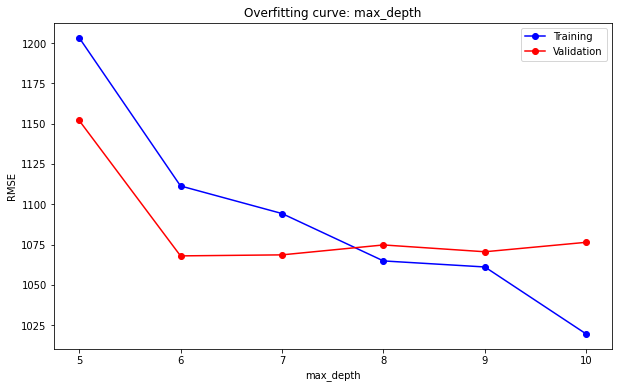

In [ ]:
import matplotlib.pyplot as plt
test_param_and_plot_dt('max_depth',[5,6,7,8,9,10])

From the figure it can be seen that max depth less than 7 and greater than 9 gives poor RMSE results

In [ ]:
test_params_dt(max_depth=9) #1162

(1061.1164674870518, 1070.5547771446065)

In [ ]:
encoded_cols = x.columns
#numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
inputs = list(encoded_cols) # + list(numeric_cols)
target = 'Item_Outlet_Sales'
inputs

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3',
 'Outlet_Identifier_OUT010',
 'Outlet_Identifier_OUT013',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT019',
 'Outlet_Identifier_OUT

In [ ]:
kfold = KFold(n_splits=10)

dt_models = []

for train_index, test_index in kfold.split(df[inputs],df[target]):
    X_train, X_test = df.loc[train_index,:], df.loc[test_index,:]
    y_train, y_test = df.loc[train_index,:][target], df.loc[test_index,:][target]

    model = DecisionTreeRegressor(max_depth=9,random_state=42, splitter='random')

    model.fit(X_train[inputs],y_train)

    dt_models.append(model)

    print("Train rmse:",mean_squared_error(y_train,model.predict(X_train[inputs]), squared=False),
                    "\nTest rmse:",mean_squared_error(y_test,model.predict(X_test[inputs]), squared=False),
                "\n-------------------------------------------------")

Train rmse: 1050.233159457237 
Test rmse: 1155.4841857282531 
-------------------------------------------------
Train rmse: 1058.189273648598 
Test rmse: 1093.0032447858778 
-------------------------------------------------
Train rmse: 1055.2159501405672 
Test rmse: 1110.6824039921617 
-------------------------------------------------
Train rmse: 1044.784219739209 
Test rmse: 1133.734908395089 
-------------------------------------------------
Train rmse: 1033.19377034409 
Test rmse: 1154.3228964232069 
-------------------------------------------------
Train rmse: 1068.095519476241 
Test rmse: 1115.5680589330036 
-------------------------------------------------
Train rmse: 1051.5234681700438 
Test rmse: 1082.9579262744376 
-------------------------------------------------
Train rmse: 1041.4732779657563 
Test rmse: 1128.2446556928267 
-------------------------------------------------
Train rmse: 1042.627129356243 
Test rmse: 1113.003560588446 
------------------------------------------

In [ ]:
# kfold = KFold(n_splits=5)

# dt_models = []
# target = 'Item_Outlet_Sales'
# #model.fit(X_train[inputs],y_train)
# for train_index, test_index in kfold.split(x,y):
#     X_train, X_test = df.loc[train_index,:], df.loc[test_index,:]
#     y_train, y_test = df.loc[train_index,:][target], df.loc[test_index,:][target]

#     model10 = DecisionTreeRegressor(max_depth=9,random_state=42, splitter='random')

#     #model10.fit(X_train[x],y_train)
#     model10.fit(train_x,train_y)

#     dt_models.append(model10)

#     print("Train rmse:",mean_squared_error(train_x,model10.predict(train_y), squared=False),
#                     "\nTest rmse:",mean_squared_error(valid_x,model10.predict(valid_y), squared=False),
#                 "\n-------------------------------------------------")

In [ ]:
preds = np.mean([model.predict(valid_x) for model in dt_models], axis=0) #1161

In [ ]:
preds = np.max([model.predict(valid_x) for model in dt_models], axis=0)

In [ ]:
# preds = np.mean([model.predict(encode(test_df)[inputs]) for model in dt_models], axis=0) #1161

In [ ]:
preds

array([1828.63378345, 2721.7904    , 1485.0579238 , ...,  510.81546765,
       2088.7576237 , 2653.69875384])

In [ ]:
dt_final = dt_models[2] #1162

##### Building a RandomForest Regressor Model

In [ ]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(train_x,train_y)
print(mean_squared_error(train_y, rf.predict(train_x), squared=False),
                    mean_squared_error(valid_y, rf.predict(valid_x), squared=False))

424.0173092403278 1113.5002933439619


In [ ]:
def test_params_rf(**params):
    model = RandomForestRegressor(n_jobs=-1, random_state=42, **params).fit(train_x, train_y)
    train_rmse = mean_squared_error(model.predict(train_x), train_y, squared=False)
    val_rmse = mean_squared_error(model.predict(valid_x), valid_y, squared=False)
    return train_rmse, val_rmse

In [ ]:
def test_param_and_plot_rf(param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_rf(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

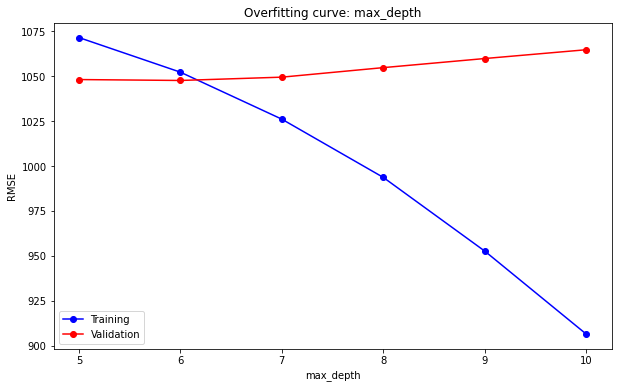

In [ ]:
test_param_and_plot_rf('max_depth',[5,6,7,8,9,10])

From the figure it can be seen that max depth less than 6 and greater than 7 gives poor RMSE results

In [ ]:
test_params_rf(min_samples_split=100)  #1156

(1007.2139394086744, 1051.8820787052211)

In [ ]:
test_params_rf(max_depth=6)

(1052.3133033394267, 1047.6967008461652)

In [ ]:
# kfold = KFold(n_splits=5,shuffle=True,random_state=42)

# rf_models = []

# for train_index, test_index in kfold.split(train_df[inputs],train_df[target]):
#     X_train, X_test = train_df.loc[train_index,:], train_df.loc[test_index,:]
#     y_train, y_test = train_df.loc[train_index,:][target], train_df.loc[test_index,:][target]

#     model = RandomForestRegressor(min_samples_split=100,random_state=42, n_jobs=-1)

#     model.fit(X_train[inputs],y_train)

#     rf_models.append(model)

#     print("Train rmse:",mean_squared_error(y_train,model.predict(X_train[inputs]), squared=False),
#                     "\nTest rmse:",mean_squared_error(y_test,model.predict(X_test[inputs]), squared=False),
#                 "\n-------------------------------------------------")

kfold = KFold(n_splits=10)

rf_models = []

for train_index, test_index in kfold.split(df[inputs],df[target]):
    X_train, X_test = df.loc[train_index,:], df.loc[test_index,:]
    y_train, y_test = df.loc[train_index,:][target], df.loc[test_index,:][target]

    model = RandomForestRegressor(min_samples_split=100,random_state=42, n_jobs=-1)

    model.fit(X_train[inputs],y_train)

    rf_models.append(model)

    print("Train rmse:",mean_squared_error(y_train,model.predict(X_train[inputs]), squared=False),
                    "\nTest rmse:",mean_squared_error(y_test,model.predict(X_test[inputs]), squared=False),
                "\n-------------------------------------------------")

Train rmse: 996.9257937088809 
Test rmse: 1111.0371062187087 
-------------------------------------------------
Train rmse: 997.6623957783164 
Test rmse: 1088.3723955007501 
-------------------------------------------------
Train rmse: 996.7165852636447 
Test rmse: 1105.9637038970607 
-------------------------------------------------
Train rmse: 1003.1405684794054 
Test rmse: 1063.0275385796108 
-------------------------------------------------
Train rmse: 998.9487171429528 
Test rmse: 1091.0426772412052 
-------------------------------------------------
Train rmse: 1001.5760738727981 
Test rmse: 1065.9486223133745 
-------------------------------------------------
Train rmse: 1003.7839666358543 
Test rmse: 1058.5061314527668 
-------------------------------------------------
Train rmse: 999.5824032405545 
Test rmse: 1082.8679934961924 
-------------------------------------------------
Train rmse: 999.7795340695116 
Test rmse: 1071.120609044432 
----------------------------------------

In [ ]:
preds = np.mean([model.predict(valid_x) for model in rf_models], axis=0) #1161
preds = np.max([model.predict(valid_x) for model in rf_models], axis=0)
preds

array([1501.85153019, 2651.92164731, 1406.54887854, ...,  476.13860108,
       1894.91575018, 2372.40443176])

In [ ]:
final_rf = rf_models[0] #1150

##### Adaboost

Adaboost uses a decision tree base estimator with a learning rate of 0.07 on the train dataset and performs validation

In [ ]:
ada = AdaBoostRegressor(base_estimator=dt_final, random_state=42, learning_rate=0.07)
ada.fit(train_x,train_y)
print(mean_squared_error(train_y, ada.predict(train_x), squared=False),
                    mean_squared_error(valid_y, ada.predict(valid_x), squared=False)) #1149

1010.5810579796332 1052.6268852769947


##### Advanced Ensembling Methods Stacking and Blending

Apply the voting regressor method with Decision Tree, Random Forest, and Adaboost estimators according to the results obtained previously

In [ ]:
vr = VotingRegressor(
                estimators = [('dt',DecisionTreeRegressor(splitter='random', max_depth=9)),('rf',RandomForestRegressor(max_depth=8)), ('ada',ada)],
                n_jobs=-1)
vr.fit(train_x,train_y)
print(mean_squared_error(train_y, vr.predict(train_x), squared=False),
                    mean_squared_error(valid_y, vr.predict(valid_x), squared=False)) #1150

996.7967037514981 1051.862062541595


In [ ]:
params_vr = {
    'dt__min_samples_split':[90,100,110],
    'rf__min_samples_split':[175,200,225],
}
randomvr = RandomizedSearchCV(estimator=vr, param_distributions=params_vr, cv=3)
randomvr.fit(train_x,train_y)
print(randomvr.best_params_)
print(mean_squared_error(train_y, randomvr.predict(train_x), squared=False),
                    mean_squared_error(valid_y, randomvr.predict(valid_x), squared=False)) #1160

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'rf__min_samples_split': 200, 'dt__min_samples_split': 110}
1036.117661061108 1048.0709805485753


Apply the stacking method with decision tree, random forest, and Adaboost

In [ ]:
sr = StackingRegressor(
            estimators=[('dt',DecisionTreeRegressor(random_state=42, splitter='random', max_depth=9)),
                         ('rf',RandomForestRegressor(random_state=42, n_jobs=-1,max_depth=8)),
                         ('ada',ada)],
            final_estimator=LinearRegression())
sr.fit(train_x,train_y)
print(mean_squared_error(train_y, sr.predict(train_x), squared=False),
                    mean_squared_error(valid_y, sr.predict(valid_x), squared=False)) #1148

1005.6972392765618 1049.3170484051652


#### Standalone Stacking (B-1)

In [ ]:
from sklearn.svm import SVR
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    return models

In [ ]:
# evaluate a given model using cross-validation
# train_x,valid_x,train_y,valid_y
def evaluate_model(model, x, y):
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, train_x, train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

The stacking model KNN, SVM, DT is tested using stratified fold cross validation 10 folds repeated 3 times using the train and test dataset

>knn -947.862 (29.888)
>cart -1063.849 (29.560)
>svm -1317.484 (31.129)


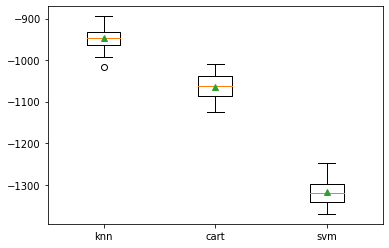

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

# # get the dataset
# def get_dataset():
#     X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1,
# random_state=1)
#     return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, x, y):
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, train_x, train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# # define dataset
# X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, train_x, train_y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Compare Standalone and Stacking (B-2)

In [ ]:
# get a list of models to evaluate
# get a stacking ensemble of models
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    #level1 = LogisticRegression()
    level1 = XGBRegressor()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['stacking'] = get_stacking()
    return models

>knn -947.862 (29.888)
>cart -1065.177 (30.612)
>svm -1317.484 (31.129)
>stacking -903.447 (24.532)


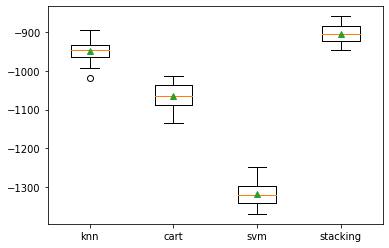

In [ ]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# # get the dataset
# def get_dataset():
#     X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1,
# random_state=1)
#     return X, y

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['stacking'] = get_stacking()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, x, y):
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, train_x, train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# # define dataset
# X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, train_x, train_y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

The stacking model KNN, SVM, DT is tested using stratified fold cross validation 10 folds repeated 3 times using the train and test dataset. Stacking has better accuracy compared to standalone methods as shown in the figure above

#### Making a Prediction with a Stacking Ensemble (B-3)

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

# # define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1,
# random_state=1)

# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))

# define meta learner model
level1 = LinearRegression()

# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
model.fit(train_x, train_y)

# make a prediction for one example
# row = [0.59332206, -0.56637507, 1.34808718, -0.57054047, -0.72480487, 1.05648449,
# 0.77744852, 0.07361796, 0.88398267, 2.02843157, 1.01902732, 0.11227799, 0.94218853,
# 0.26741783, 0.91458143, -0.72759572, 1.08842814, -0.61450942, -0.69387293, 1.69169009]
#yhat = model.predict([valid_x])
yhat=model.predict(valid_x)

# summarize prediction
print(yhat)
#print('Predicted Value: %.3f' % (yhat))

[1957.05399942 2902.42761702 1170.84850211 ...  916.32979948 1511.57887294
 1961.33257142]


In [ ]:
valid_y

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [ ]:
model.score(valid_x, valid_y)

0.47326301040543395

In [ ]:
r2_score(valid_y, yhat)

0.47326301040543395

In [ ]:
mean_squared_error(valid_y, yhat)

1435550.4185344218

The prediction results are not good because it uses LinearRegression as the base learner with r2 of 0.47 where this result is not better than simple ensemble learning

#### Blending Ensemble for Regression (C-2)

In [ ]:
# evaluate blending ensemble for regression
from numpy import hstack
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# # get the dataset
# def get_dataset():
#     X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3,
#     random_state=7)
#     return X, y

# get a list of base models
def get_models():
    models = list()
    models.append(('lr', LinearRegression()))
    models.append(('knn', KNeighborsRegressor()))
    models.append(('cart', DecisionTreeRegressor()))
    models.append(('svm', SVR()))
    return models

# fit the blending ensemble
def fit_ensemble(models, train_x, valid_x, train_y, valid_y):
    # fit all models on the training set and predict on hold out set
    meta_X = list()
    for _, model in models:
        # fit in training set
        model.fit(train_x, train_y)
        # predict on hold out set
        yhat = model.predict(valid_x)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store predictions as input for blending
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # define blending model
    blender = LinearRegression()
    # fit on predictions from base models
    blender.fit(meta_X, valid_y)
    return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, valid_x):
    # make predictions with base models
    meta_X = list()
    for _, model in models:
        # predict with base model
        yhat = model.predict(valid_x)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store prediction
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # predict
    return blender.predict(meta_X)

# define dataset
# X, y = get_dataset()
# split dataset into train and test sets
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.5,
#     random_state=1)

# # split training set into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
# test_size=0.33, random_state=1)

# summarize data split
#print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, train_x, valid_x, train_y, valid_y)
# make predictions on test set
yhat = predict_ensemble(models, blender, valid_x)
# evaluate predictions
score = mean_absolute_error(valid_y, yhat)
print('Blending MAE: %.3f' % score)

Blending MAE: 807.294


Blending gives fairly good results compared to stacking but not better than XgBoost

In [ ]:
# evaluate base models in isolation on the regression dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# # get the dataset
# def get_dataset():
#     X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3,
#     random_state=7)
#     return X, y

# get a list of base models
def get_models():
    models = list()
    models.append(('lr', LinearRegression()))
    models.append(('knn', KNeighborsRegressor()))
    models.append(('cart', DecisionTreeRegressor()))
    models.append(('svm', SVR()))
    return models

# # define dataset
# X, y = get_dataset()
# # split dataset into train and test sets
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.5,
# random_state=1)
# # summarize data split
# print('Train: %s, Test: %s' % (X_train_full.shape, X_test.shape))
# # create the base models
models = get_models()

# evaluate standalone model
for name, model in models:
    # fit the model on the training dataset
    model.fit(train_x, train_y)
    # make a prediction on the test dataset
    yhat = model.predict(valid_x)
    # evaluate the predictions
    score = mean_absolute_error(valid_y, yhat)
    # report the score
    print('>%s MAE: %.3f' % (name, score))

>lr MAE: 825.151
>knn MAE: 909.812
>cart MAE: 1069.588
>svm MAE: 1275.745


In [ ]:
# example of making a prediction with a blending ensemble for regression
from numpy import hstack
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# # get the dataset
# def get_dataset():
#     X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3,
#     random_state=7)
#     return X, y

# get a list of base models
def get_models():
    models = list()
    models.append(('lr', LinearRegression()))
    models.append(('knn', KNeighborsRegressor()))
    models.append(('cart', DecisionTreeRegressor()))
    models.append(('svm', SVR()))
    return models

# fit the blending ensemble
def fit_ensemble(models, train_x, valid_x, train_y, valid_y):
    # fit all models on the training set and predict on hold out set
    meta_X = list()
    for _, model in models:
        # fit in training set
        model.fit(train_x, train_y)
        # predict on hold out set
        yhat = model.predict(valid_x)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store predictions as input for blending
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # define blending model
    blender = LinearRegression()
    # fit on predictions from base models
    blender.fit(meta_X, valid_y)
    return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, valid_x):
    # make predictions with base models
    meta_X = list()
    for _, model in models:
        # predict with base model
        yhat = model.predict(valid_x)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store prediction
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # predict
    return blender.predict(meta_X)

# # define dataset
# X, y = get_dataset()
# # split dataset set into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)
# # summarize data split
# print('Train: %s, Val: %s' % (X_train.shape, X_val.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, train_x, valid_x, train_y, valid_y)

# make a prediction on a new row of data
# row = [-0.24038754, 0.55423865, -0.48979221, 1.56074459, -1.16007611, 1.10049103,
#     1.18385406, -1.57344162, 0.97862519, -0.03166643, 1.77099821, 1.98645499, 0.86780193,
#     2.01534177, 2.51509494, -1.04609004, -0.19428148, -0.05967386, -2.67168985, 1.07182911]
# yhat = predict_ensemble(models, blender, [row])
# # summarize prediction
# print('Predicted: %.3f' % (yhat[0]))

yhat=model.predict(valid_x)

# summarize prediction
print(yhat)

[1802.02116665 1807.3146703  1799.53429039 ... 1811.26976382 1803.59331187
 1807.54147091]


#### Super Learner Ensemble for Regression (D-2)

In [ ]:
# example of a super learner model for regression
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# create a list of base-models
def get_models():
    models = list()
    models.append(ElasticNet())
    models.append(SVR(gamma='scale'))
    models.append(DecisionTreeRegressor())
    models.append(KNeighborsRegressor())
    models.append(AdaBoostRegressor())
    models.append(BaggingRegressor(n_estimators=10))
    models.append(RandomForestRegressor(n_estimators=10))
    models.append(ExtraTreesRegressor(n_estimators=10))
    return models

# for train_index, test_index in kfold.split(df[inputs],df[target]):
#     X_train, X_test = df.loc[train_index,:], df.loc[test_index,:]
#     y_train, y_test = df.loc[train_index,:][target], df.loc[test_index,:][target]

# collect out of fold predictions from cross validation
x = df[inputs]
y = df[target]
def get_out_of_fold_predictions(x, y, models):
    meta_X, meta_y = list(), list()
    # define split of data
    kfold = KFold(n_splits=10, shuffle=True)
    # enumerate splits
    for train_ix, test_ix in kfold.split(df[inputs],df[target]):
        fold_yhats = list()
        # get data
        train_X, test_X = df.loc[train_ix,:], df.loc[test_ix,:]
        train_y, test_y = df.loc[train_ix,:][target], df.loc[test_ix,:][target]
        meta_y.extend(test_y)
        # fit and make predictions with each sub-model
        for model in models:
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            # store columns
            fold_yhats.append(yhat.reshape(len(yhat),1))
        # store fold yhats as columns
        meta_X.append(hstack(fold_yhats))
    return vstack(meta_X), asarray(meta_y)

# fit all base models on the training dataset
def fit_base_models(X, y, models):
    for model in models:
        model.fit(X, y)

# fit a meta model
def fit_meta_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
    for model in models:
        yhat = model.predict(X)
        mae = mean_absolute_error(y, yhat)
        print('%s: MAE %.3f' % (model.__class__.__name__, mae))

# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
    meta_X = list()
    for model in models:
        yhat = model.predict(X)
        meta_X.append(yhat.reshape(len(yhat),1))
    meta_X = hstack(meta_X)
    # predict
    return meta_model.predict(meta_X)

# create the inputs and outputs
# X, y = make_regression(n_samples=1000, n_features=100, noise=0.5, random_state=1)
# # split
# X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
# print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)

# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(x, y, models)
print('Meta ', meta_X.shape, meta_y.shape)

# fit base models
fit_base_models(x, y, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)

# evaluate base models
evaluate_models(valid_x, valid_y, models)
# evaluate meta model
yhat = super_learner_predictions(valid_x, models, meta_model)
score = mean_absolute_error(valid_y, yhat)
print('Super Learner: MAE %.3f' % score)

Meta  (8523, 8) (8523,)
ElasticNet: MAE 900.499
SVR: MAE 1274.495
DecisionTreeRegressor: MAE 0.000
KNeighborsRegressor: MAE 714.449
AdaBoostRegressor: MAE 903.553
BaggingRegressor: MAE 322.597
RandomForestRegressor: MAE 316.376
ExtraTreesRegressor: MAE 0.000
Super Learner: MAE 900.499


When compared with Xgboost and blending, superlearner does not produce a better MAE value. Among the three, XGboost has good results with MAE of 765

In [ ]:
import pandas as pd
dataev = {'':['R2'],
          'LR':[0.5578],
          'KNN':[0.4196],
          'DT':[0.5776],
          'Max Voting':[0.5578],
          'Averaging':[0.5686],
          'Weighted Averaging':[0.5803],
         'Rank Averaging':[0.5828],}
pd.DataFrame(dataev).transpose()

,0
,R2
LR,0.5578
KNN,0.4196
DT,0.5776
Max Voting,0.5578
Averaging,0.5686
Weighted Averaging,0.5803
Rank Averaging,0.5828


In [ ]:
import pandas as pd
dataev = {'':['MAE'],
          'XGB':[765.077],
          'LR' :[1102.346],
          'DF' :[1528.783],
          'RF' :[1113.500],
          'Ada' :[1052.6268],
          'Voting Regressor (DF, RF, Ada)' :[1051.8620],
         'Stacking (DF, RF, Ada)':[1049.3170],
         'KNN':[947.862],
         'DT':[1065.177],
         'SVM':[1317.484],
        'Stacking (KNN, DT, SVM)':[903.447],
        'Blending' :[807.294],}
pd.DataFrame(dataev).transpose()

,0
,MAE
XGB,765.077
LR,1102.346
DF,1528.783
RF,1113.5
Ada,1052.6268
"Voting Regressor (DF, RF, Ada)",1051.862
"Stacking (DF, RF, Ada)",1049.317
KNN,947.862
DT,1065.177


Conclusion from the model experiments using simple ensemble, XGBoost, stacking, blending, and super learner. The best result obtained is XGBoost with MAE of 765.077 or r2 of 0.597 while the simple ensemble Rank Averaging model has r2 of 0.5828.

The experiment must go through hyperparameter tuning to find better results that match the model used. In addition, pre-processing still needs to be reviewed to check whether there are process errors causing the results to not reach 60%. However, the experimental data has been cleaned according to the BigMart dataset example used in the provided Python code in Classroom in the file “Python Basic Ensemble Techniques” which also produces a simple ensemble process that does not reach r2 above 60%. Therefore, the conclusion of this experiment is that more parameter experiments are needed for each model used. By replacing the meta learner with XGBoost.